In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

## 1-a $X^{(i)}$ and $r_t$ expression 

$dX_{t}^{(i)} = \lambda_i (\theta_i - X_{t}^{(i)})dt + \sigma_i dB_{t}^{i}$   

In [20]:
def XOU(theta,lamb,sigma, x,B):
    X_n = np.zeros(shape=(M,n-1))
    X_n = np.hstack((np.array([np.array([x]*M)]).T,X_n)) # initialisation
    time = np.linspace(0,T,n)
    h=T/n
    
    for k in range(1,n):
        #remplissage du tableau de volatilité
        X_n[:,k]= theta + (X_n[:,k-1]-theta)*np.exp(-lamb*h) + sigma*np.exp(-lamb*(time[k]-time[k-1]))*B[:,k-1]
    return X_n

## Define $r_t$

$r_t = X_{t}^{1} + X_{t}^{2}$

In [21]:
# define the constants
lamb1=1
lamb2=0.1
n=1500
T=15
M=10000
theta=0.05
x=0.02
sigma=0.05

# build the brownien motion 1
np.random.seed(0)
h = T/n
times=np.linspace(0,T,n)
echantillon1=np.random.randn(M,n)
echantillon=np.sqrt(h)*echantillon1[:,:-1]
W1 =np.cumsum(echantillon, axis=1)
W1=np.hstack((np.array([np.array([0]*M)]).T,W1))
B1 = W1[:,1:]-W1[:,:-1]

# build the brownien motion 2
echantillon1=np.random.randn(M,n)
echantillon=np.sqrt(h)*echantillon1[:,:-1]
W2 =np.cumsum(echantillon, axis=1)
W2=np.hstack((np.array([np.array([0]*M)]).T,W2))
B2 = W2[:,1:]-W2[:,:-1]

# define the Orstein Ulhenbeck X^(i)

X_1 = XOU(theta,lamb1,sigma, x,B1)
X_2 = XOU(theta,lamb2,sigma, x,B2)

r_t = X_1 + X_2

## 1-b Monte Carlo approximation

$P_{0}(T) = E^{Q} [e^{-\int_{0}^{T} r_t dt}]$

$R_0(T) = - \frac{ln(P_0 (T))}{T}$

In [28]:
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_0 = -np.log(P_0[1:])/times[1:]

## 1-c compare

In [39]:
def phi(theta,lamb,sigma, x,t):
    exp=np.exp(-lamb*t)
    r=theta+(x-theta)*(1-exp)/(lamb*t) - ((sigma**2)/(4*t*lamb**3))*(-3+4*exp-exp**2+2*lamb*t)
    return r

In [40]:
R_exp = phi(theta,lamb1,sigma, x,times[1:])+ phi(theta,lamb2,sigma, x,times[1:])

## Visualisation

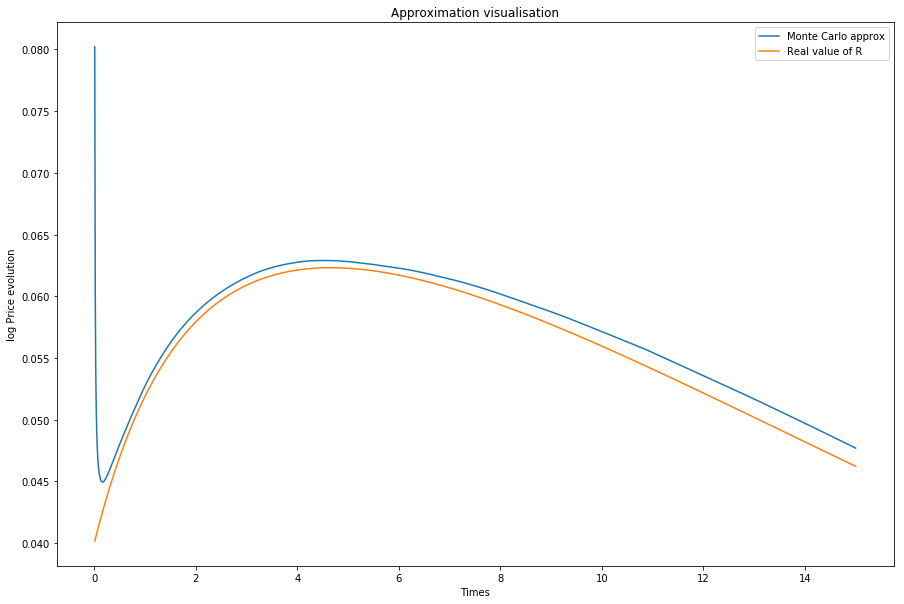

In [41]:
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_0, label='Monte Carlo approx')
plt.plot(times[1:],R_exp, label='Real value of R')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

The divergence as t approaches 0 can be explain by the numerical error, as the boundedness of $ \frac{ln(P_0 (T))}{T}$ is lost when computing the estimator.

## 2-a Fixing $x_2$

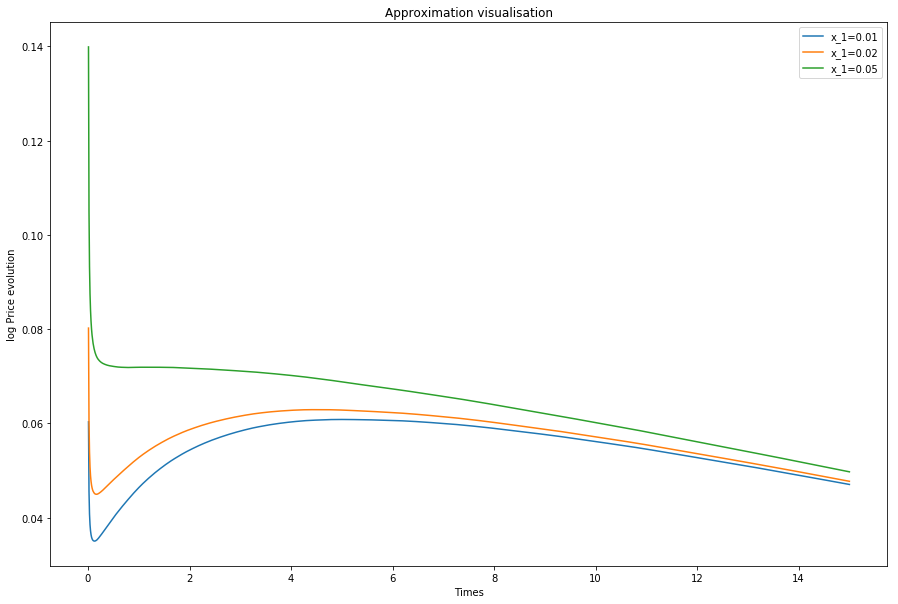

In [43]:
#constant
lamb1=1
lamb2=0.1
theta1=0.05
theta2=0.05
x1=0.01
x2=0.02
sigma1=0.05
sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

x1=0.02
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

x1=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='x_1=0.01')
plt.plot(times[1:],R_02, label='x_1=0.02')
plt.plot(times[1:],R_03, label='x_1=0.05')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

## 2-b Fixing $x_1$

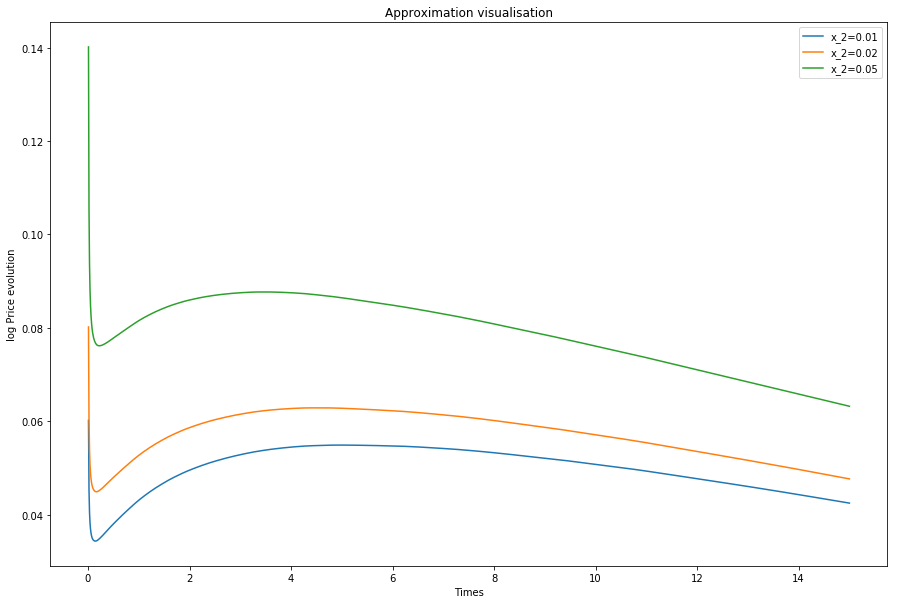

In [44]:
#constant
lamb1=1
lamb2=0.1
theta1=0.05
theta2=0.05
x1=0.02
x2=0.01
sigma1=0.05
sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

x2=0.02
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

x2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='x_2=0.01')
plt.plot(times[1:],R_02, label='x_2=0.02')
plt.plot(times[1:],R_03, label='x_2=0.05')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

It seems varying the starting values x changes asymptotic price and shifts the maturity curve. The effect of changing it for either factor is the same: the starting value of an Ornstein-Uhlenbeck process doesn't interact with the other parameters of its dynamics.

## Fixing $\theta_2$

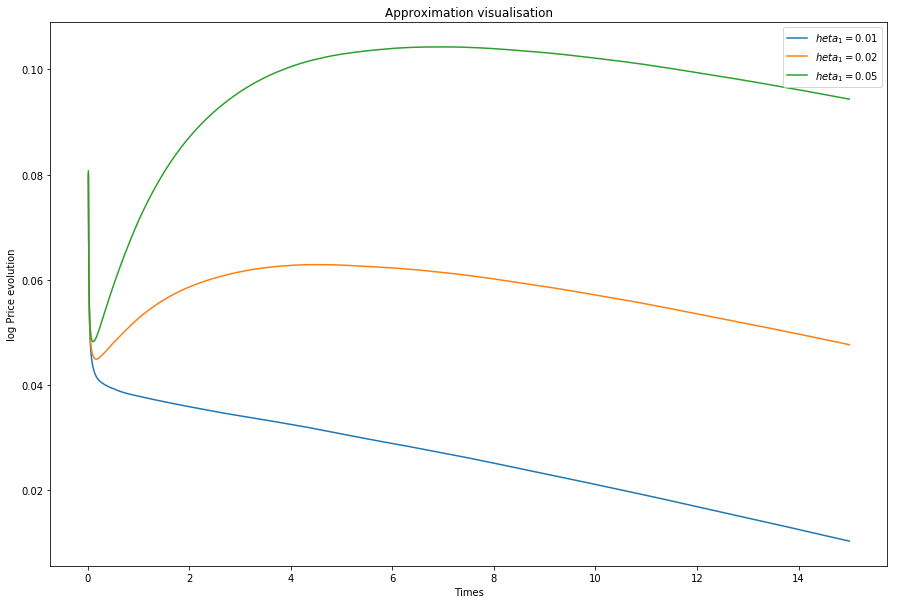

In [50]:
#constant
lamb1=1
lamb2=0.1
theta1=0.01
theta2=0.05
x1=0.02
x2=0.02
sigma1=0.05
sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

theta1=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

theta1=0.1
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='$\theta_1=0.01$')
plt.plot(times[1:],R_02, label='$\theta_1=0.02$')
plt.plot(times[1:],R_03, label='$\theta_1=0.05$')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

## Fixing $\theta_1$

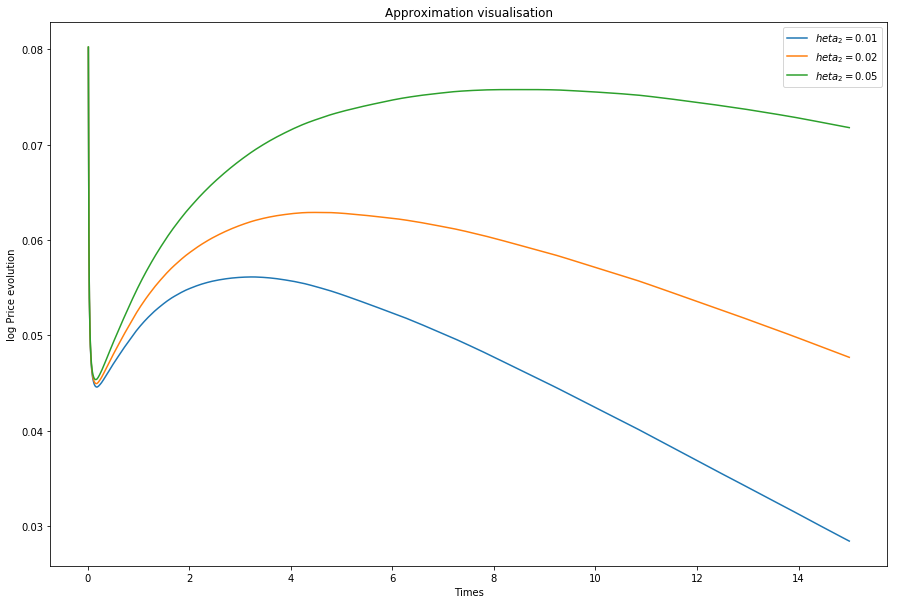

In [49]:
#constant
lamb1=1
lamb2=0.1
theta1=0.05
theta2=0.01
x1=0.02
x2=0.02
sigma1=0.05
sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

theta2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

theta2=0.1
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='$\theta_2=0.01$')
plt.plot(times[1:],R_02, label='$\theta_2=0.02$')
plt.plot(times[1:],R_03, label='$\theta_2=0.05$')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

The higher drift $\lambda_i $, of the factors $X_i$ means faster reversal towards the mean than the other factor. So changing the mean $\theta_i$ of the factors has a higher impact on the ZCB price.

## Fixing $\sigma_2$

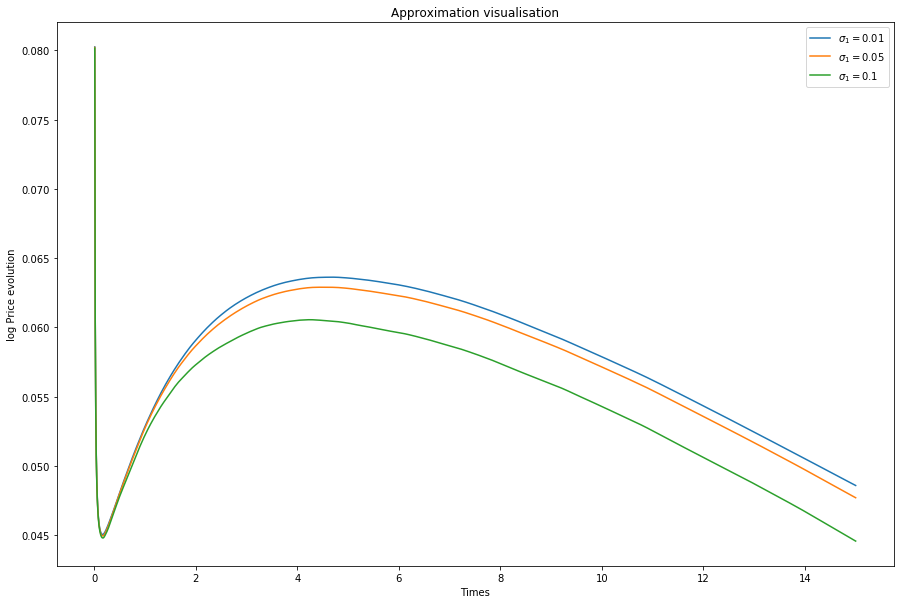

In [47]:
#constant
lamb1=1
lamb2=0.1
theta1=0.05
theta2=0.05
x1=0.02
x2=0.02
sigma1=0.01
sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

sigma1=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

sigma1=0.1
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='$\sigma_1=0.01$')
plt.plot(times[1:],R_02, label='$\sigma_1=0.05$')
plt.plot(times[1:],R_03, label='$\sigma_1=0.1$')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

## Fixing $\sigma_1$

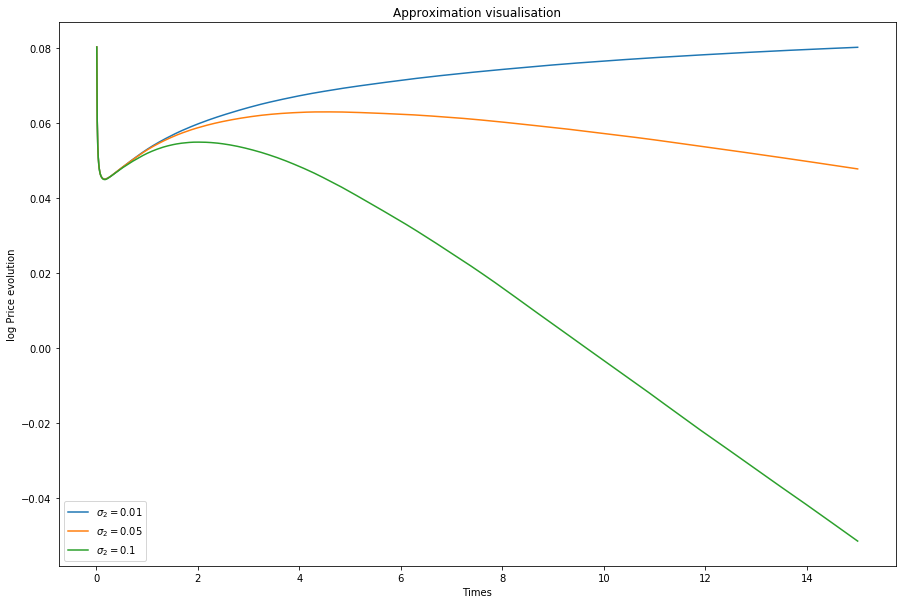

In [48]:
#constant
lamb1=1
lamb2=0.1
theta1=0.05
theta2=0.05
x1=0.02
x2=0.02
sigma1=0.05
sigma2=0.01
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_01 = -np.log(P_0[1:])/times[1:]

sigma2=0.05
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_02 = -np.log(P_0[1:])/times[1:]

sigma2=0.1
# define X^(i)
X_1 = XOU(theta1,lamb1,sigma1, x1,B1)
X_2 = XOU(theta2,lamb2,sigma2, x2,B2)
#define r_t
r_t = X_1 + X_2
#define the price
P_0 = np.exp(-h*np.cumsum(r_t, axis = 1)).mean(axis=0)
R_03 = -np.log(P_0[1:])/times[1:]


#visualisation
plt.figure(figsize=(15,10))

plt.plot(times[1:],R_01, label='$\sigma_2=0.01$')
plt.plot(times[1:],R_02, label='$\sigma_2=0.05$')
plt.plot(times[1:],R_03, label='$\sigma_2=0.1$')
plt.xlabel("Times")
plt.ylabel("log Price evolution")
plt.title("Approximation visualisation")
plt.legend()

plt.show()

Since the drift $\lambda_2$ parameter for the second factor $X_2$ is lower, changing its volatility $\sigma_2$ has much more impact on the rate and the ZCB price!